In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import lxml
from tqdm import tqdm

In [2]:
url = 'https://www.pagina12.com.ar/'
p12 = requests.get(url)

In [3]:
p12.status_code

200

In [4]:
p12.headers

{'Date': 'Sat, 05 Dec 2020 02:52:00 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=dfe3165b8e9d536750da0a7e5b680e2f31607136719; expires=Mon, 04-Jan-21 02:51:59 GMT; path=/; domain=.pagina12.com.ar; HttpOnly; SameSite=Lax', 'Vary': 'Accept-Encoding', 'X-DNS-Prefetch-Control': 'off', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains', 'X-Download-Options': 'noopen', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'X-ETag': 'W/"5ffb5-flvGMCji1R5Ndk0h1T17ZDA6JrU"', 'X-Backend': 'frontend', 'X-Backend-TTL': '180.000', 'X-Type': 'Dynamic URI', 'Age': '5', 'grace': '86400.000 none', 'ttl': '114.641', 'X-Instance': 'cache-front-prod-varnish-7f9f4bb47d-zszxq', 'x-restarts': '0', 'X-Cache': 'HIT (15)', 'CF-Cache-Status': 'DYNAMIC', 'cf-request-id': '06d2694c450000b2c0d685c000000001', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/be

In [5]:
p12.request.headers

{'User-Agent': 'python-requests/2.25.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [6]:
s = BeautifulSoup(p12.text, 'html.parser')

In [7]:
type(s)

bs4.BeautifulSoup

In [8]:
s.prettify()

'<!DOCTYPE html>\n<html class="no-js">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   Página12 | La otra mirada\n  </title>\n  <meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/>\n  <script type="application/ld+json">\n   {"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}\n  </script>\n  <meta content="Notas focalizadas en el quehacer político de la Argentina." name="description" property="description"/>\n  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>\n  <meta content="es_AR" name="og:locale" property="og:locale"/>\n  <meta content="Página12 | La 

In [9]:
secciones = s.find('ul', attrs={'class':'horizontal-list main-sections hide-on-dropdown'}).find_all('li')
secciones

[<li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>,
 <li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>,
 <li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>,
 <li class="no-separator-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li>,
 <li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>,
 <li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>,
 <li class="hide-on-1040"><a href="https://www.pagina12.com.ar/secciones/contratapa">Contratapa</a></li>]

In [10]:
seccion_el_pais = secciones[0]
seccion_el_pais

<li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>

In [11]:
seccion_el_pais.a.get_text()

'El país'

In [12]:
seccion_el_pais_link = seccion_el_pais.a.get('href')
seccion_el_pais_link

'https://www.pagina12.com.ar/secciones/el-pais'

In [13]:
#list comprenhension
links_secciones = [sec.a.get('href') for sec in secciones]
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/contratapa']

## Obteniendo listado de notas

Probemos con una sección cualquiera

In [14]:
sec = requests.get(links_secciones[0])
sec.status_code

200

In [15]:
s = BeautifulSoup(sec.text, 'html.parser')

In [16]:
print(s.prettify())

<!DOCTYPE html>
<html amp="" lang="es">
 <head>
  <meta charset="utf-8"/>
  <title>
   El país | Página12
  </title>
  <!-- DUST PATH: /usr/src/app/src/widgets/fc_jsonLD.dust/ -->
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}
  </script>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "NewsArticle","mainEntityOfPage": {"@type": "WebPage","@id": "https://www.pagina12.com.ar/secciones/el-pais"},"headline": "El país | Página12","isAccessibleForFree": false,"image": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo

In [17]:
featured_article = s.find('div', attrs={'class':'article-item__content'})
featured_article

<div class="article-item__content"><!-- Title --><h2 class="title-list"><a href="https://www.pagina12.com.ar/310068-aporte-de-las-grandes-fortunas-a-quienes-alcanza-y-en-que-se">Aporte de las Grandes Fortunas: A quiénes alcanza y en qué se utilizarán los fondos</a></h2><!-- Kicker --></div>

In [18]:
featured_article.a.get('href')

'https://www.pagina12.com.ar/310068-aporte-de-las-grandes-fortunas-a-quienes-alcanza-y-en-que-se'

#### Extrayendo el resto de las notas

In [19]:
article_list = s.find('div', attrs={'class':'articles-list'})
article_list

<div class="articles-list is-grid-col2 grid-mobile-row"><!-- DUST PATH: /usr/src/app/src/templates/partials/amp/lists/articles_list_item.dust/ --><!-- DUST PATH: /usr/src/app/src/templates/partials/amp/articles/featured_article.dust/ --><article class="article-item article-item--featured"><!-- Image --><div class="article-item__header"><a href="https://www.pagina12.com.ar/310066-los-gobernadores-le-pidieron-a-alberto-fernandez-la-suspensi"><!-- DUST PATH: /usr/src/app/node_modules/frontend-core/views/widgets/fc_displayImg_amp.dust/ --><amp-img alt='El presidente Alberto Fernández, junto al ministro del Interior, Eduardo "Wado" de Pedro, y el gobernador de Formosa, Gildo Insfrán, durante la firma del Consenso Fiscal.' class="" height="313" layout="responsive" src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2020-12/125551-consesnso-20fiscalel-presidente-alberto-fer-721014.jpg?itok=2WGbvNAs" srcset="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2020-12

In [20]:
#Using list comprenhension to solve this problem
article_content = s.find_all('div', attrs={'class': 'article-item__content'})
article_content_a_ref = [article_href.a.get('href') for article_href in article_content]
article_content_a_ref

['https://www.pagina12.com.ar/310068-aporte-de-las-grandes-fortunas-a-quienes-alcanza-y-en-que-se',
 'https://www.pagina12.com.ar/310066-los-gobernadores-le-pidieron-a-alberto-fernandez-la-suspensi',
 'https://www.pagina12.com.ar/310049-larreta-presento-cuatro-proyectos-de-ley-para-acelerar-los-n',
 'https://www.pagina12.com.ar/310041-facundo-molares-regreso-a-la-argentina',
 'https://www.pagina12.com.ar/310034-movilizacion-y-abrazo-solidario-en-rechazo-a-la-condena-a-am',
 'https://www.pagina12.com.ar/310028-amado-boudou-funcionarios-y-dirigentes-cuestionaron-la-decis',
 'https://www.pagina12.com.ar/310026-el-senado-aprobo-la-ley-de-manejo-del-fuego',
 'https://www.pagina12.com.ar/309999-fernando-espinoza-vamos-a-volver-a-hacer-realidad-que-los-bo',
 'https://www.pagina12.com.ar/309978-hebe-de-bonafini-cumple-92-anos',
 'https://www.pagina12.com.ar/309966-aborto-legal-diputados-sigue-el-debate-en-comision',
 'https://www.pagina12.com.ar/309961-capitales-alternas-el-gobierno-promulgo-l

In [21]:
url_nota = article_content_a_ref[0]
url_nota

'https://www.pagina12.com.ar/310068-aporte-de-las-grandes-fortunas-a-quienes-alcanza-y-en-que-se'

In [24]:
try:
    nota = requests.get(url_nota)
    if nota.status_code == 200:
        s_nota = BeautifulSoup(nota.text, 'html.parser')
        #extraemos el titulo
        titulo = s_nota.find('h1', attrs={'class': 'article-title'})
        print(titulo.text)
        #extraemos fecha
        fecha = s_nota.find('span', attrs={'pubdate': 'pubdate'}).get('datetime')
        print(fecha)
        #extraemos la volanta
        volanta = s_nota.find('h2', attrs={'class': 'article-prefix'})
        if volanta:
            print(volanta.get_text())
        else:
            print("No hay volanta")
        
except Exception as e:
    print("Error")
    print(e)
    print("\n")

Aporte de las Grandes Fortunas: A quiénes alcanza y en qué se utilizarán los fondos
2020-12-04
No hay volanta


In [25]:
media = s_nota.find('div', attrs={'class': 'article-main-media-image'})

In [26]:
images = media.find_all('img')
images

[<img class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2020-12/125546-whatsapp-20image-202020-12-04-20at-2020-25-26.jpeg?itok=1UEDRFgF" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-small-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-12/125546-whatsapp-20image-202020-12-04-20at-2020-25-26.jpeg?itok=82vJxord" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-medium-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-12/125546-whatsapp-20image-202020-12-04-20at-2020-25-26.jpeg?itok=82vJxord" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-large-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-12/125546-whatsapp-20image-202020-12-04-20at-2020-25-26.jpeg?itok=8

In [27]:
if len(images) == 0:
    print("No hay imagenes")
else:
    imagen = images[-1]
    imagen_src = imagen.get('data-src')
    print(imagen_src)

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-12/125546-whatsapp-20image-202020-12-04-20at-2020-25-26.jpeg?itok=82vJxord


In [28]:
image_req = requests.get(imagen_src)

In [29]:
image_req.status_code

200

In [30]:
image_req.content

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xc2\x00\x11\x08\x02\x80\x03\xc0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x00\x06\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x04\x05\x06\x07\x08\x00\x02\t\n\x01\x0b\xff\xda\x00\x08\x01\x01\x00\x00\x00\x00\xf04-\xa8\xea\xa7,\xa9\xe7\xd5\xf3\x9aM\xbdg|\xc8\xb5\xf7\x9d\xb4\xe9\x04\xb9\xdb\xfd\xd8\xbe?\xd0\x14\x8d2\xef{\xbb\xf3a\xe6\xd4\x1c\x14\xc3\x8d\x9e\xe

In [31]:
from IPython.display import Image

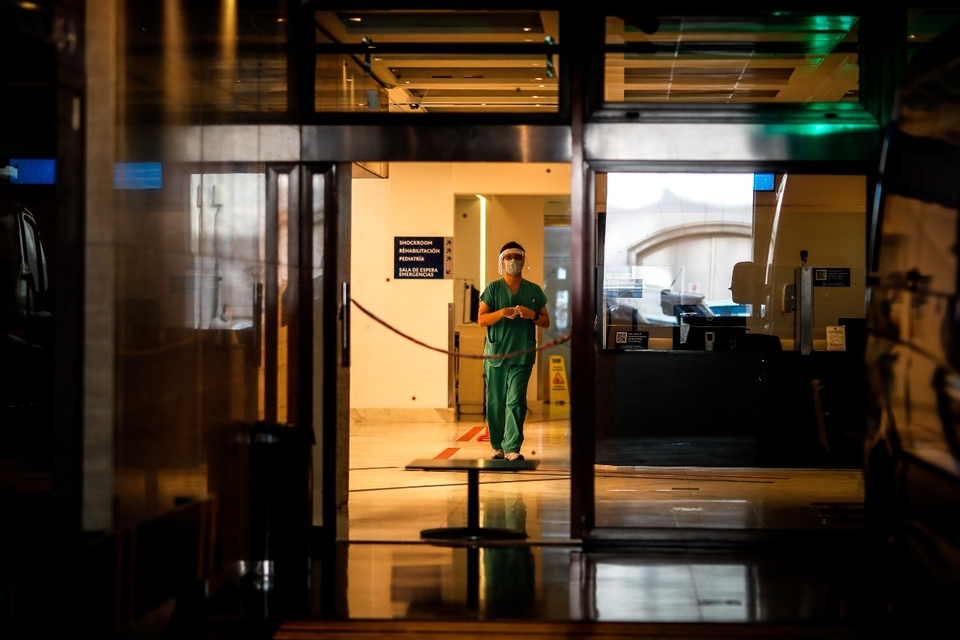

In [32]:
Image(image_req.content)

In [ ]:
def obtener_nota(s_nota):
    #creamos un diccionario vacio para llenarlo con la información
    ret_dict = {}
     #extraemos el titulo
    titulo = s_nota.find('h1', attrs={'class': 'article-title'})
    if titulo:
        ret_dict['titulo'] = titulo.text
    else:
        ret_dict['titulo'] = None
    #extraemos fecha
    fecha = s_nota.find('span', attrs={'pubdate': 'pubdate'})
    if fecha:
        ret_dict['fecha'] = fecha.get('datetime')
    else:
        ret_dict['fecha'] = None
    #extraemos la volanta
    volanta = s_nota.find('h2', attrs={'class': 'article-prefix'})
    if volanta:
        ret_dict['volanta'] = volanta.get_text()
    else:
        ret_dict['volanta'] = None
    

In [15]:
for li in article_list.find_all('li'):
    if len(li.get_text()) == 0:
        li.decompose()

In [16]:
[li.get_text() for li in article_list.find_all('li')]

['Para frenar el decreto de importación de basura|Diputados del FpV-PJ se reunieron con ambientalistas y cartoneros03 de octubre de 2019',
 'La policía podrá pedir el DNI en los trenes por decisión de Patricia Bullrich|Para la ministra todos somos sospechosos03 de octubre de 2019',
 'Imputaron al intendente Tagliaferro\xa0|Por el uso de recursos de la municipalidad en la campaña03 de octubre de 2019',
 'Para evitar la "boleta doblada" de Cambiemos en la Ciudad|El Frente de Todos reclamó ante la Justicia que deban exhibirse de forma apaisada\xa003 de octubre de 2019',
 'Día de la no violencia|Pérez Esquivel03 de octubre de 2019',
 'Ruta 7: después del simulacro de Macri llegaron los despidos|Las contratistas echaron a 40 trabajadores03 de octubre de 2019',
 'Encuentro por la emergencia ambiental|Diputados03 de octubre de 2019',
 'Kicillof propuso a los ruralistas trabajar para "llegar a la mayor cantidad de acuerdos posibles"|Los candidatos hablaron en el encuentro de la Carbap03 de oct

Ya obtuvimos los tags con contenido. Ahora extraemos los links a las notas.

In [17]:
items = [li.a.get('href') for li in article_list.find_all('li')]
items

['https://www.pagina12.com.ar/223220-para-frenar-el-decreto-de-importacion-de-basura',
 'https://www.pagina12.com.ar/223211-la-policia-podra-pedir-el-dni-en-los-trenes-por-decision-de-',
 'https://www.pagina12.com.ar/223143-imputaron-al-intendente-tagliaferro',
 'https://www.pagina12.com.ar/223004-para-evitar-la-boleta-doblada-de-cambiemos-en-la-ciudad',
 'https://www.pagina12.com.ar/223147-dia-de-la-no-violencia',
 'https://www.pagina12.com.ar/223021-ruta-7-despues-del-simulacro-de-macri-llegaron-los-despidos',
 'https://www.pagina12.com.ar/223148-encuentro-por-la-emergencia-ambiental',
 'https://www.pagina12.com.ar/223149-kicillof-propuso-a-los-ruralistas-trabajar-para-llegar-a-la-',
 'https://www.pagina12.com.ar/223152-paro-de-pilotos-el-fin-de-semana',
 'https://www.pagina12.com.ar/223153-indagatorias-por-torturas',
 'https://www.pagina12.com.ar/223069-la-propuesta-de-lammens-contra-la-corrupcion-en-la-ciudad',
 'https://www.pagina12.com.ar/223087-la-camara-ordeno-excarcelar-a-gera

Ahora metamos todo el proceso en una función

In [18]:
def scrap_section_page(url):
    '''
    Función que recibe la url de una sección del diario y devuelve una lista con los links a las notas
    '''
    
    # Obtenemos la página
    try:
        r = requests.get(url)
    except Exception as e:
        print('Error obteniendo la página. Excepción ',e)
        return np.nan
    
    if r.status_code != 200:
        print('Error obteniendo la página. Status Code', r.status_code)
        return np.nan
    
    # Generamos una lista vacía para ir poblándola con las notas
    lista_notas = []
    
    # Parseamos el HTML de la página
    s = BeautifulSoup(r.text, 'lxml')
    
    # Obtenemos la noticia promocionada
    featured_article = s.find('div', attrs={'class':'featured-article__container'})
    if featured_article is not None:
        try:
            lista_notas.append(featured_article.a.get('href'))
        except:
            pass
    
    # Obtenemos la lista de noticias
    article_list = s.find('ul', attrs={'class':'article-list'})
    # Obtenemos los items de la lista
    items = article_list.find_all('li')
    # Extraemos los links de los items que no están vacíos
    for li in items:
        if li.a is not None:
            lista_notas.append(li.a.get('href'))
    
    return lista_notas

Probemos la función

In [19]:
scrap_section_page(links_secciones[0])

['https://www.pagina12.com.ar/223224-la-causa-por-la-noche-del-apagon-cuatro-anos-sin-avances',
 'https://www.pagina12.com.ar/223220-para-frenar-el-decreto-de-importacion-de-basura',
 'https://www.pagina12.com.ar/223211-la-policia-podra-pedir-el-dni-en-los-trenes-por-decision-de-',
 'https://www.pagina12.com.ar/223143-imputaron-al-intendente-tagliaferro',
 'https://www.pagina12.com.ar/223004-para-evitar-la-boleta-doblada-de-cambiemos-en-la-ciudad',
 'https://www.pagina12.com.ar/223147-dia-de-la-no-violencia',
 'https://www.pagina12.com.ar/223021-ruta-7-despues-del-simulacro-de-macri-llegaron-los-despidos',
 'https://www.pagina12.com.ar/223148-encuentro-por-la-emergencia-ambiental',
 'https://www.pagina12.com.ar/223149-kicillof-propuso-a-los-ruralistas-trabajar-para-llegar-a-la-',
 'https://www.pagina12.com.ar/223152-paro-de-pilotos-el-fin-de-semana',
 'https://www.pagina12.com.ar/223153-indagatorias-por-torturas',
 'https://www.pagina12.com.ar/223069-la-propuesta-de-lammens-contra-la-c

Para extraer varias páginas de la misma sección:

In [20]:
notas = []
for link in links_secciones:
    for pagina in range(5):
        url = link+f'?page={pagina}'
        print(f'Obteniendo links de {url}')
        notas += scrap_section_page(url)

Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=0
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=1
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=2
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=3
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=4
Obteniendo links de https://www.pagina12.com.ar/secciones/economia?page=0
Obteniendo links de https://www.pagina12.com.ar/secciones/economia?page=1
Obteniendo links de https://www.pagina12.com.ar/secciones/economia?page=2
Obteniendo links de https://www.pagina12.com.ar/secciones/economia?page=3
Obteniendo links de https://www.pagina12.com.ar/secciones/economia?page=4
Obteniendo links de https://www.pagina12.com.ar/secciones/sociedad?page=0
Obteniendo links de https://www.pagina12.com.ar/secciones/sociedad?page=1
Obteniendo links de https://www.pagina12.com.ar/secciones/sociedad?page=2
Obteniendo links de https://www.pagina12.co

In [21]:
len(notas)

518

Eliminamos notas duplicadas

In [22]:
notas = set(notas)

In [23]:
len(notas)

514

In [24]:
np.random.choice(list(notas),10)

array(['https://www.pagina12.com.ar/217955-el-hombre-del-agujero',
       'https://www.pagina12.com.ar/222851-kimberly-clark-sigue-ocupada',
       'https://www.pagina12.com.ar/222458-el-sueno-de-una-offshore-a-la-vuelta-de-la-esquina',
       'https://www.pagina12.com.ar/221222-suenan-los-ninos-con-vengadores-electricos',
       'https://www.pagina12.com.ar/221796-definen-suba-del-6',
       'https://www.pagina12.com.ar/223037-el-paseo-del-bajo-si-se-inunda',
       'https://www.pagina12.com.ar/222928-que-macri-deje-de-firmar-decretos-para-los-amigos',
       'https://www.pagina12.com.ar/221741-sandleris-culpo-a-la-incertidumbre-electoral',
       'https://www.pagina12.com.ar/207278-ataque-al-sindicalismo-y-anticuerpos-culturales',
       'https://www.pagina12.com.ar/222888-varisco-a-las-trompadas'],
      dtype='<U95')

## Scraping de una nota

In [25]:
nota = requests.get('https://www.pagina12.com.ar/222818-river-vs-boca-obligan-a-exactas-a-suspender-las-clases-por-e')
nota.status_code

200

In [26]:
s_nota = BeautifulSoup(nota.text, 'lxml')
print(s_nota.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   La facultad de suspender todo lo que no se llame fú...  | Página12
  </title>
  <link href="https://www.pagina12.com.ar/222818-la-facultad-de-suspender-todo-lo-que-no-se-llame-futbol" rel="canonical"/>
  <link href="https://www.pagina12.com.ar/amp/222818-la-facultad-de-suspender-todo-lo-que-no-se-llame-futbol" rel="amphtml"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}
  </script>
  <meta content="La política del gobierno de la Ciudad de postergar todo en pos de 
priorizar el partido chocó hasta con la autonomía universitaria, enarbolada por la Fa..." name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta conte

### Extrayendo la fecha

La fecha de la nota se encuentra en un tag *span* con el atributo **pubdate="pubdate"**

In [27]:
s_nota.find('span', attrs={'pubdate':'pubdate'})

<span datetime="2019-10-02" pubdate="pubdate">02 de octubre de 2019</span>

Para extraer la fecha, la podemos sacar del atributo **datetime**

In [28]:
s_nota.find('span', attrs={'pubdate':'pubdate'}).get('datetime')

'2019-10-02'

O del texto del tag

In [29]:
s_nota.find('span', attrs={'pubdate':'pubdate'}).get_text()

'02 de octubre de 2019'

### Extrayendo el título

El título de las notas suele estar recortado en la URL, por eso es conveniente sacarlo de la nota en sí.

In [30]:
s_nota.find('div', attrs={'class':'article-title'})

<div class="article-title">La facultad de suspender todo lo que no se llame fútbol</div>

In [31]:
s_nota.find('div', attrs={'class':'article-title'}).get_text()

'La facultad de suspender todo lo que no se llame fútbol'

### Extrayendo la volanta

In [32]:
s_nota.find('div', attrs={'class':'article-prefix'})

<div class="article-prefix">El operativo de seguridad porteño por el Superclásico invadió muchas esferas</div>

In [33]:
s_nota.find('div', attrs={'class':'article-title'}).get_text()

'La facultad de suspender todo lo que no se llame fútbol'

### Extrayendo el copete

In [34]:
s_nota.find('div', attrs={'class':'article-summary'})

<div class="article-summary">La política del gobierno de la Ciudad de postergar todo en pos de
priorizar el partido chocó hasta con la autonomía universitaria, enarbolada por la Facultad de Exactas. El rol del Comité de Seguridad del Fútbol de CABA y el absolutismo en el ministerio encabezado por Patricia Bullrich.</div>

In [35]:
s_nota.find('div', attrs={'class':'article-summary'}).get_text()

'La política del gobierno de la Ciudad de postergar todo en pos de\npriorizar el partido chocó hasta con la autonomía universitaria, enarbolada por la Facultad de Exactas. El rol del Comité de Seguridad del Fútbol de CABA y el absolutismo en el ministerio encabezado por Patricia Bullrich.'

### Extrayendo el texto de la nota

In [36]:
texto_nota = s_nota.find('div', attrs={'class':'article-text'})
texto_nota

<div class="article-text"><p><b>El saber no ocupa lugar, dice un viejo proverbio. El fútbol parece que sí.</b> Omnipresente como es –y más si se trata de un <b>River vs. Boca por la Copa Libertadores</b>– otra vez dio señales de cómo lo invade todo. El problema es que el deporte-espectáculo, cuando produce un evento como el Superclásico, adquiere un <b>protagonismo que congela o anula a las demás actividades</b>.<br/></p><p> Esa idea se fortalece cuando desde<b> un ministerio que cree tener el poder absoluto en sus manos –el de Seguridad de Patricia Bullrich– </b>se estimula el concepto de que en la vida se suspende todo menos un partido, "el partido". Esa política después se contagia a otras áreas semejantes. <b>Se cierran calles, estaciones, escuelas</b>, instalaciones de clubes no vinculadas al fútbol y también universidades. Este panorama lo hizo visible un comunicado de la <b>Facultad de Ciencias Exactas y Naturales de la UBA</b> que salió al cruce de Marcelo D'Alessandro, el secr

Tenemos 2 tags indeseados:
- un 'div' con contenido embebido
- un 'a' con una referencia al mail del autor

In [37]:
def scrap_texto(texto_nota):
    
    texto=None
    try:
        texto_nota.find('div').decompose()
    except:
        pass
    try:
        texto_nota.find('a', attrs={'class':"__cf_email__"}).decompose()
    except:
        pass
    try:
        texto = texto_nota.get_text()
    except:
        pass
    
    return texto

In [38]:
scrap_texto(texto_nota)

'El saber no ocupa lugar, dice un viejo proverbio. El fútbol parece que sí. Omnipresente como es –y más si se trata de un River vs. Boca por la Copa Libertadores– otra vez dio señales de cómo lo invade todo. El problema es que el deporte-espectáculo, cuando produce un evento como el Superclásico, adquiere un protagonismo que congela o anula a las demás actividades. Esa idea se fortalece cuando desde un ministerio que cree tener el poder absoluto en sus manos –el de Seguridad de Patricia Bullrich– se estimula el concepto de que en la vida se suspende todo menos un partido, "el partido". Esa política después se contagia a otras áreas semejantes. Se cierran calles, estaciones, escuelas, instalaciones de clubes no vinculadas al fútbol y también universidades. Este panorama lo hizo visible un comunicado de la Facultad de Ciencias Exactas y Naturales de la UBA que salió al cruce de Marcelo D\'Alessandro, el secretario de Justicia y Seguridad de la CABA, aunque no lo nombra más que por el car

### Extrayendo el autor

In [39]:
s_nota.find('div', attrs={'class':'article-author'})

<div class="article-author"><span><span>Por </span><a href="https://www.pagina12.com.ar/autores/845-gustavo-veiga">Gustavo Veiga</a></span></div>

En este caso el nombre del autor se encuentra dentro del tag 'a' con referencia a su propia página

In [40]:
s_nota.find('div', attrs={'class':'article-author'}).a.get_text()

'Gustavo Veiga'

### Extrayendo la sección

In [41]:
s_nota.find('div', attrs={'class':'suplement'})

<div class="suplement"><a href="https://www.pagina12.com.ar/secciones/deportes/notas">Deportes</a></div>

In [42]:
s_nota.find('div', attrs={'class':'suplement'}).get_text()

'Deportes'

### Extrayendo la imagen principal

In [43]:
s_nota.find('div', attrs={'class':'article-main-media-image'})

<div class="article-main-media-image"><div class="article-main-media-image__container object-fit-block--contain"><img alt="Amplia presencia de las fuerzas de seguridad en las inmediaciones del Monumental." class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/media/articles/20992/d0026581-0.jpg?itok=dgH7jMow"/><img alt="Amplia presencia de las fuerzas de seguridad en las inmediaciones del Monumental." class="lazyload show-for-small-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/20992/d0026581-0.jpg?itok=JC0EaAic"/><img alt="Amplia presencia de las fuerzas de seguridad en las inmediaciones del Monumental." class="lazyload show-for-medium-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/20992/d0026581-0.jpg?itok=JC0EaAic"/><img alt="Amplia presencia de las fuerzas de seguridad en las inmediaciones del Monumental." class="lazyload show-for-la

Extraemos la imagen

In [44]:
s_nota.find('div', attrs={'class':'article-main-media-image'}).find_all('img')

[<img alt="Amplia presencia de las fuerzas de seguridad en las inmediaciones del Monumental." class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/media/articles/20992/d0026581-0.jpg?itok=dgH7jMow"/>,
 <img alt="Amplia presencia de las fuerzas de seguridad en las inmediaciones del Monumental." class="lazyload show-for-small-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/20992/d0026581-0.jpg?itok=JC0EaAic"/>,
 <img alt="Amplia presencia de las fuerzas de seguridad en las inmediaciones del Monumental." class="lazyload show-for-medium-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/20992/d0026581-0.jpg?itok=JC0EaAic"/>,
 <img alt="Amplia presencia de las fuerzas de seguridad en las inmediaciones del Monumental." class="lazyload show-for-large-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/20992

Hay más de una imágen! veamos las diferencias

In [45]:
[img.get('data-src') for img in s_nota.find('div', attrs={'class':'article-main-media-image'}).find_all('img')]

['https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/media/articles/20992/d0026581-0.jpg?itok=dgH7jMow',
 'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/20992/d0026581-0.jpg?itok=JC0EaAic',
 'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/20992/d0026581-0.jpg?itok=JC0EaAic',
 'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/20992/d0026581-0.jpg?itok=JC0EaAic',
 'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/20992/d0026581-0.jpg?itok=JC0EaAic']

Intentemos quedarnos con la imagen de mayor tamaño

In [46]:
media = s_nota.find('div', attrs={'class':'article-main-media-image'})
imagenes = media.find_all('img')
if len(imagenes) == 0:
    print('no se encontraron imágenes')
elif len(imagenes) == 1:
    # Hay un único link
    imagen = imagenes[0]
    img = imagen.get('data-src')
else:
    imagen = media.find('img',attrs={'class':'show-for-xlarge'})
    if imagen is None:
        imagen = media.find('img',attrs={'class':'show-for-large'})
        if imagen is None:
            imagen = media.find('img',attrs={'class':'show-for-medium'})
            if imagen is None:
                imagen = media.find('img',attrs={'class':'show-for-small'})
                if imagen is None:
                    imagen = media.find('img',attrs={'class':'show-for-xsmall'})
                    if imagen is None:
                        print('No se pudo recuprerar imagen')
    if imagen is not None:
        img =  imagen.get('data-src')
img    

'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/20992/d0026581-0.jpg?itok=JC0EaAic'

Obtenemos la imagen

In [47]:
img_data = requests.get(img)

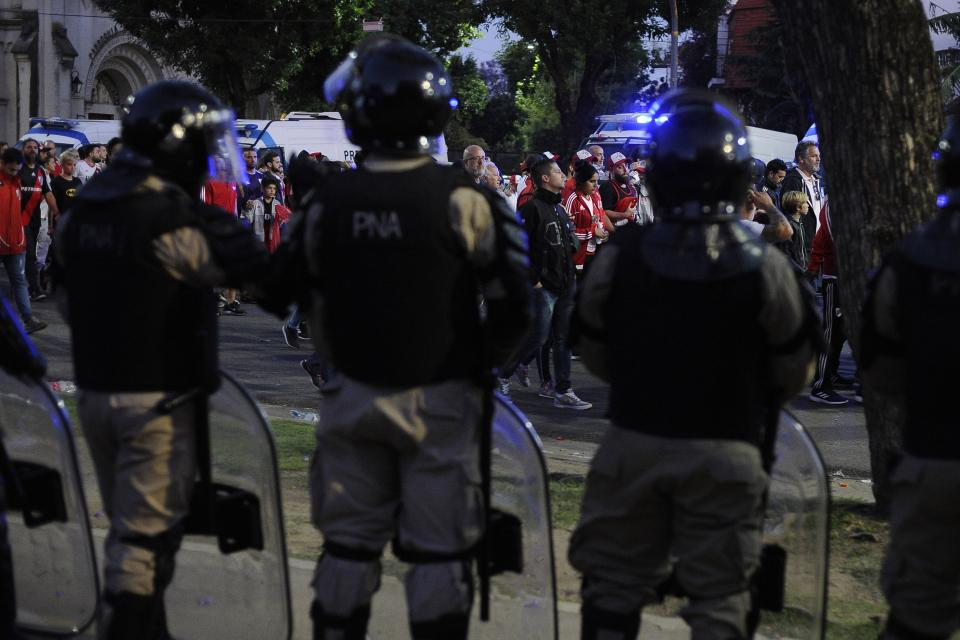

In [48]:
from IPython.display import Image
Image(img_data.content)

In [49]:
def extraer_imagen(soup_nota):
    #soup_nota.find('div', attrs={'class':'article-main-media-image'}).find_all('img')
    media = soup_nota.find('div', attrs={'class':'article-main-media-image'})
    if media is None:
        print('Nota sin imagen')
        return np.nan
    imagenes = media.find_all('img')
    if len(imagenes) == 0:
        print('no se encontraron imágenes')
    elif len(imagenes) == 1:
        # Hay un único link
        imagen = imagenes[0]
        img = imagen.get('data-src')
    else:
        imagen = media.find('img',attrs={'class':'show-for-xlarge'})
        if imagen is None:
            imagen = media.find('img',attrs={'class':'show-for-large'})
            if imagen is None:
                imagen = media.find('img',attrs={'class':'show-for-medium'})
                if imagen is None:
                    imagen = media.find('img',attrs={'class':'show-for-small'})
                    if imagen is None:
                        imagen = media.find('img',attrs={'class':'show-for-xsmall'})
                        if imagen is None:
                            print('No se pudo recuprerar imagen')
        if imagen is not None:
            img =  imagen.get('data-src')
    try:
        img_data = requests.get(img)
    except Exception as e:
        print('Error obteniendo imagen, con error', e)
    if img_data.status_code == 200:
        return img_data.content
    else:
        print('Error obteniendo imagen, con status code: ', img_data.status_code)
        return np.nan
    

In [50]:
import numpy as np
def scrap_nota(url):
    '''
    Función que recibe la URL de una nota y devuelve un diccionario con la información de la misma
    '''
    # Hago la request a la url de la nota
    nota = requests.get(url)
    # Verifico si hubo error
    if nota.status_code != 200:
        print('Error obteniendo nota. Status code: {}'.format(nota.status_code))
        return np.nan
    
    # Preparo el diccionario para el retorno
    ret_dict = {'url':url}
    
    # Parseo el contenido
    s_nota = BeautifulSoup(nota.text, 'lxml')
    
    # Extraigo la fecha
    try:
        ret_dict['fecha'] = s_nota.find('span', attrs={'pubdate':'pubdate'}).get('datetime')
    except:
        ret_dict['fecha'] = np.nan
    
    # Extraigo el titulo
    try:
        ret_dict['titulo'] = s_nota.find('div', attrs={'class':'article-title'}).get_text()
    except:
        ret_dict['titulo'] = np.nan
    
    # Extraigo la volanta
    try:
        ret_dict['volanta'] = s_nota.find('div', attrs={'class':'article-title'}).get_text()
    except:
        ret_dict['volanta'] = np.nan
    
    # Extraigo el copete
    try:
        ret_dict['copete'] = s_nota.find('div', attrs={'class':'article-summary'}).get_text()
    except:
        ret_dict['copete'] = np.nan
    
    # Extraigo el texto
    try:
        texto_nota = s_nota.find('div', attrs={'class':'article-text'})
        ret_dict['texto'] = scrap_texto(texto_nota)
    except:
        ret_dict['texto'] = np.nan
        
    # Extraigo el autor
    try:
        ret_dict['autor'] = s_nota.find('div', attrs={'class':'article-author'}).a.get_text()
    except:
        ret_dict['autor'] = np.nan
    
    # Extraigo la seccion
    try:
        ret_dict['seccion'] = s_nota.find('div', attrs={'class':'suplement'}).get_text()
    except:
        ret_dict['seccion'] = np.nan
    
    # Extraigo la imagen
    ret_dict['imagen'] = extraer_imagen(s_nota)
    
    return ret_dict
    
        

La facultad de suspender todo lo que no se llame fútbol


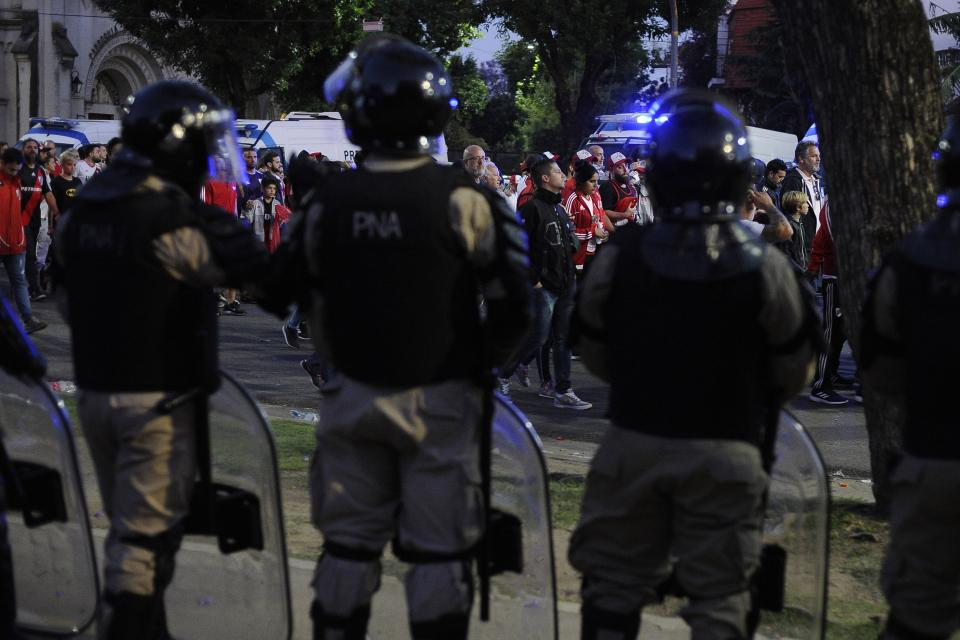

In [51]:
info_nota = scrap_nota('https://www.pagina12.com.ar/222818-river-vs-boca-obligan-a-exactas-a-suspender-las-clases-por-e')
print(info_nota['titulo'])
Image(info_nota['imagen'])

Tenemos una función que a partir de la URL de un artículo, extrae toda la información deseada. Ahora armemos una lista de urls a escrapear:

In [52]:
data = []
for i,url in enumerate(notas):
    print(f'Scraping nota {i+1}/{len(notas)}...')
    data.append(scrap_nota(url))

Scraping nota 0/514...
Scraping nota 1/514...
Scraping nota 2/514...
Scraping nota 3/514...
Scraping nota 4/514...
Scraping nota 5/514...
Scraping nota 6/514...
Nota sin imagen
Scraping nota 7/514...
Scraping nota 8/514...
Scraping nota 9/514...
Scraping nota 10/514...
Scraping nota 11/514...
Scraping nota 12/514...
Scraping nota 13/514...
Scraping nota 14/514...
Scraping nota 15/514...
Scraping nota 16/514...
Scraping nota 17/514...
Scraping nota 18/514...
Scraping nota 19/514...
Nota sin imagen
Scraping nota 20/514...
Scraping nota 21/514...
Scraping nota 22/514...
Scraping nota 23/514...
Scraping nota 24/514...
Scraping nota 25/514...
Scraping nota 26/514...
Scraping nota 27/514...
Scraping nota 28/514...
Scraping nota 29/514...
Nota sin imagen
Scraping nota 30/514...
Scraping nota 31/514...
Scraping nota 32/514...
Scraping nota 33/514...
Scraping nota 34/514...
Scraping nota 35/514...
Scraping nota 36/514...
Scraping nota 37/514...
Scraping nota 38/514...
Scraping nota 39/514...
Sc

Scraping nota 322/514...
Scraping nota 323/514...
Scraping nota 324/514...
Scraping nota 325/514...
Scraping nota 326/514...
Scraping nota 327/514...
Scraping nota 328/514...
Scraping nota 329/514...
Scraping nota 330/514...
Scraping nota 331/514...
Scraping nota 332/514...
Nota sin imagen
Scraping nota 333/514...
Scraping nota 334/514...
Scraping nota 335/514...
Scraping nota 336/514...
Scraping nota 337/514...
Scraping nota 338/514...
Scraping nota 339/514...
Scraping nota 340/514...
Scraping nota 341/514...
Scraping nota 342/514...
Scraping nota 343/514...
Scraping nota 344/514...
Scraping nota 345/514...
Scraping nota 346/514...
Scraping nota 347/514...
Scraping nota 348/514...
Scraping nota 349/514...
Scraping nota 350/514...
Scraping nota 351/514...
Scraping nota 352/514...
Scraping nota 353/514...
Scraping nota 354/514...
Scraping nota 355/514...
Scraping nota 356/514...
Scraping nota 357/514...
Scraping nota 358/514...
Scraping nota 359/514...
Scraping nota 360/514...
Scraping 

In [53]:
df = pd.DataFrame(data)
df.head()

,url,fecha,titulo,volanta,copete,texto,autor,seccion,imagen
0,https://www.pagina12.com.ar/221810-el-estado-a...,2019-09-28,El Estado argentino reconoció haber vulnerado ...,El Estado argentino reconoció haber vulnerado ...,NaN,"""Las niñas son niñas, y deben poder ser niñas,...",Sofía Caram,Sociedad,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
1,https://www.pagina12.com.ar/221982-mario-ledes...,2019-09-29,"Mario Ledesma: ""Entramos en una especie de esp...","Mario Ledesma: ""Entramos en una especie de esp...",NaN,"El entrenador de Los pumas, Mario Ledesma, se ...",Sofía Caram,Deportes,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
2,https://www.pagina12.com.ar/223024-derechos-en...,2019-10-02,"""Derechos en juego"", la campaña de Amnistía In...","""Derechos en juego"", la campaña de Amnistía In...",Un ring de lucha libre en el que “Salario Míni...,Amnistía Internacional lanzó una campaña para ...,Sofía Caram,El país,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
3,https://www.pagina12.com.ar/222906-un-amigo-mu...,2019-10-02,Un amigo muy afortunado,Un amigo muy afortunado,NaN,El empresario británico Joseph Lewis aumentó s...,Sofía Caram,Economía,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
4,https://www.pagina12.com.ar/223016-en-chernoby...,2019-10-03,En Chernobyl abren a los turistas la sala dond...,En Chernobyl abren a los turistas la sala dond...,La visita costará 499 dólares y exigirá usar m...,"Luego del furor de la serie de HBO, la sala de...",Sofía Caram,Sociedad,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 9 columns):
url        514 non-null object
fecha      514 non-null object
titulo     514 non-null object
volanta    514 non-null object
copete     210 non-null object
texto      514 non-null object
autor      514 non-null object
seccion    514 non-null object
imagen     485 non-null object
dtypes: object(9)
memory usage: 36.3+ KB
